# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

## 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [7]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2) 경로 확인하기
- "WORK_SPACE" 에 본인 작업 경로 작성 후 실행(구글 드라이브 최상위에 압축해제 시 그대로 실행. 수정 X).<br>

<font color="red">※ 주의. 나머지 경로는 절대 변경하지 마세요.</font>

In [8]:
# ROOT_PATH 확인 
import os

# 구글 드라이브 내 프로젝트 압축해제된 영역 (구글 드라이브 최상위에 압축해제하였을 경우 수정하지 않으셔도 됩니다.)
WORK_SPACE = "/content/drive/MyDrive/AIVLE/P5_올레TV 코너 몰아보기"

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = WORK_SPACE
else :
  ROOT_PATH = os.path.abspath('..')

# 영상 파일 경로
VIDEO_PATH = ROOT_PATH + "/video"
# 영상을 분할한 이미지 경로
IMAGE_PATH = ROOT_PATH + "/image"


### 3) 비디오 데이터 다운로드하기
아래 코드를 실행하세요.

In [ ]:
# test data 다운로드
!pip install gdown

import gdown
import shutil
import zipfile
 
google_path = 'https://drive.google.com/uc?id='
file_id = '1C3e9zD2_FWqk0va0UcG1kOEHoBdvhpca'
output_name = 'video.zip'

# 파일 다운로드
gdown.download(google_path+file_id,output_name,quiet=False)

# 파일 위치 이동
shutil.move("./" + output_name, ROOT_PATH)

zip_file = ROOT_PATH + "/" + output_name

# 압축해제 
with zipfile.ZipFile(zip_file) as z:
    z.extractall(ROOT_PATH)

os.remove(zip_file)

### 4) 라이브러리 불러오기
필요시 추가 라이브러리는 설치해서 사용하세요.

In [ ]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

---

# 데이터 탐색부터 먼저 시작해보겠습니다.

## ▣ 데이터 소개
[기본 데이터]
* 원본 영상 : 슈퍼맨이 돌아왔다 '21년 7월 영상을 출연진 별로 가공한 영상
* 파일 경로 : .VIDEO_PATH = "./video"
* 파일명 : park.mp4, sam.mp4, sayuri.mp4, jung.mp4

---

## 1. 데이터 불러오기

### 1) 비디오 데이터 확인하기

<font color="green">[실습문제]</font> 1. 비디오 데이터들의 경로를 <u>LIST</u>에  저장하기
* 파일 경로에서 파일들의 경로를 변수명 "video_list" 리스트에 저장하세요. 
> <font color="red"><b>[Hint]</b></font> <br>
> 비디오 파일 경로는 <u>'VIDEO_PATH'</u> 입니다.<br>
> 영상 파일 확장자는 <u>'mp4'</u> 입니다. <br>
> 라이브러리 <u>'glob'</u>을 활용하여 파일들 경로 리스트를 만들 수 있습니다.

In [9]:
# 실습해보세요.
video_list = glob.glob(VIDEO_PATH + '/*.mp4')

print(video_list)

['/content/drive/MyDrive/AIVLE/P5_올레TV 코너 몰아보기/video/jung.mp4', '/content/drive/MyDrive/AIVLE/P5_올레TV 코너 몰아보기/video/park.mp4', '/content/drive/MyDrive/AIVLE/P5_올레TV 코너 몰아보기/video/sam.mp4', '/content/drive/MyDrive/AIVLE/P5_올레TV 코너 몰아보기/video/sayuri.mp4']


<font color="green">[실습문제]</font> 2. 비디오 파일들의 졍보를 확인하세요. (openCV 활용)



In [11]:
# 실습해보세요.
## 영상의 파일 이름, 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이

for v in video_list:
  video = cv2.VideoCapture(v)

  video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
  video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
  video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)
  video_fps = video.get(cv2.CAP_PROP_FPS)

  print(os.path.basename(v))
  print('가로: ', video_width)
  print('세로: ', video_height)
  print('총 프레임 수: ', video_length)
  print('FPS: ', video_fps)
  print('영상 길이: %d 초'%round(video_length/video_fps))
  print()

  video.release()

jung.mp4
가로:  854.0
세로:  480.0
총 프레임 수:  27001.0
FPS:  30.0
영상 길이: 900 초

park.mp4
가로:  854.0
세로:  480.0
총 프레임 수:  37801.0
FPS:  30.0
영상 길이: 1260 초

sam.mp4
가로:  854.0
세로:  480.0
총 프레임 수:  27001.0
FPS:  30.0
영상 길이: 900 초

sayuri.mp4
가로:  854.0
세로:  480.0
총 프레임 수:  37801.0
FPS:  30.0
영상 길이: 1260 초



### 2) 동영상 프레임 단위로 나눠 이미지 데이터 만들기

<font color="green">[실습문제]</font> 3. 이미지 추출하여 저장하기
* 위에서 저장한 "video_list"에 있는 파일들을 분할하여 이미지 데이터로 만드세요.
* 이미지 저장 경로 : IMAGE_PATH = ROOT_PATH + "/image" <br>
> <font color="red"><b>[Hint]</b></font> <br>
> 파일의 경로가 저장된 video_list를 for문을 활용해서 하나씩 불러오세요.

In [12]:
# 실습해보세요.

if not os.path.exists(IMAGE_PATH):
    os.mkdir(IMAGE_PATH)

for v in video_list:
  video = cv2.VideoCapture(v)
  TIME_MEASUERMENT_UNIT = 1

  video_name = os.path.basename(v)
  video_name = os.path.splitext(video_name)[0]

  if not os.path.exists(IMAGE_PATH + '/' + video_name):
    os.mkdir(IMAGE_PATH + '/' + video_name)

  while video.isOpened():
    ret, frame = video.read()
    
    if ret:
      frame_sec = video.get(cv2.CAP_PROP_POS_MSEC) / 1000
      if frame_sec.is_integer():
        if (frame_sec % TIME_MEASUERMENT_UNIT == 0):
          filename = IMAGE_PATH + '/' + video_name + '/' + str(round(frame_sec)) + '.jpg'
      cv2.imwrite(filename, frame) 

    else:
      break

  video.release()

<font color="green">[실습문제]</font> 4. 이미지 파일 열어서 확인하기
* 전체 이미지 중 각 출연진 별로 5장을 열어서 확인해보세요.
> <font color="red"><b>[Hint]</b></font> <br>
> matplotlib subplot() 함수를 사용해 보세요.<br>
> 참고1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html# <br>
> 참고2. https://foss4g.tistory.com/1263

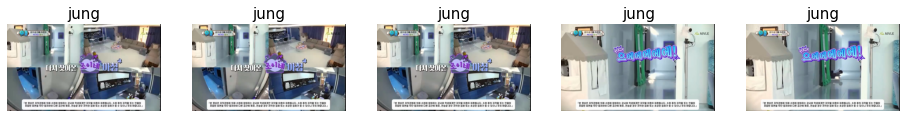

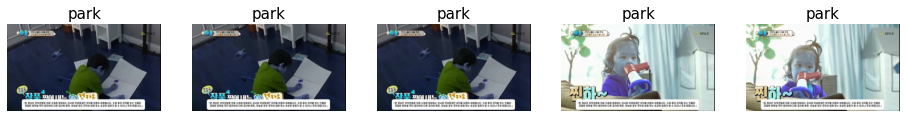

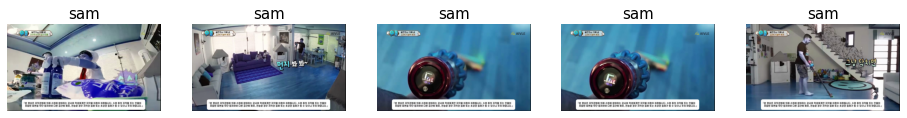

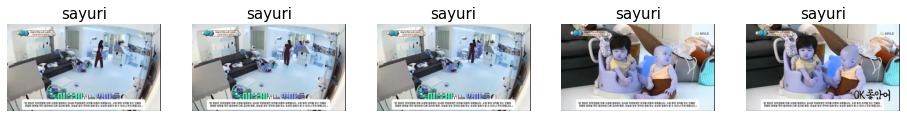

In [13]:
# 실습해보세요.
for v in video_list:
  video_name = os.path.basename(v)
  video_name = os.path.splitext(video_name)[0]
  path = IMAGE_PATH + '/' + video_name

  img_list = glob.glob(path + "/*.jpg")
  fig, axes = plt.subplots(1, 5,figsize=(16, 9))

  for i in range(5):
    original_image = cv2.imread(img_list[i])
    rgb_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
    axes[i].imshow(original_image)
    axes[i].set_title(video_name , fontsize=15)    
    axes[i].axis('off')
    
  plt.show()